<a href="https://colab.research.google.com/github/hallam-flda/gambling_market_analyses/blob/main/Roulette_and_Markov_Chains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Budget Constraints and Casino Profitability - A Statistical Approach**




## Introduction

The relationship between the target return to casino and actual returns with respect to a stop gap can be described as a stochastic process with stopping time.

It has been a long time since I learnt any of this, so I'm going to start by going over some of the theory


## Simple Random Walk




### Proof of Expected Value
For a random Independent and Identically Distributed variable

<br>

$$Y_i \stackrel{iid}{\sim} \begin{cases}
1, & \text{with probability } 0.5 \\
-1, & \text{with probability } 0.5
\end{cases}$$

for each $t,$   


$$X_{t} = \displaystyle\sum_{i=1}^{t} Y_i$$

and


$$X_{0} = 0$$

<br>

since the probability of both outcomes is 0.5, over infinite repeats we would expect the final balance for a player in a fair coin-toss game to be

<br>
$$ E\left[X_t\right] = E\left[\displaystyle\sum_{i=1}^t Y_i\right] = \displaystyle\sum_{i=1}^t E\left[Y_i\right] = t \cdot 0 = 0$$

<br>


since we have t repetitions of $E\left[Y_i\right]$ and

<br>


$$ E\left[Y_i\right] = (-1) \cdot P(Y_i = -1) + (1) \cdot P(Y_i = 1) $$

$$= (-1) \cdot 0.5 + (1) \cdot 0.5 = 0$$

### Proof of Variance

#### 1. For Single Step

The equation for the variance of any random variable is given by the following equation:

<br>

$$ \mathrm{Var}[{X}] = E[X^2] - (E[X])^2$$

<br>

therefore the variance after a single step $Y_{i}$ is given by:

<br>

$$ \mathrm{Var}(Y_{i}) = E[Y_{i}^2]-(E[Y_{i}])^2 $$

<br>

$Y_{i}$ can only take two values, -1 or 1, or more formally:

<br>
$$ Y_{i} \in \left\{ -1, 1 \right\} $$

<br>

therefore:

<br>

$$E[Y_{i}^2] = (-1)^2 \cdot P(Y_{i} = -1) + (1)^2 \cdot P(Y_{i} = 1) = 1 \cdot 0.5 + 1 \cdot 0.5 = 0.5 + 0.5 = 1$$

<br>

and the mean value is given by:

<br>

$$ E[Y_{i}] = (-1) \cdot 0.5 + 1 \cdot 0.5 = 0 $$

<br>

so the square of the mean term in the variance equation is:

<br>

$$ (E[Y_{i}])^2 = 0^2 = 0 $$

<br>

and therefore substituting these into the variance formula yields:

<br>

$$ \mathrm{Var}(Y_{i}) = E[Y_{i}^2]-(E[Y_{i}])^2 = 1 - 0^2 = 1 $$

#### 2. For Any Step t

From the Expected Value proof we know that $ X_{t} = \displaystyle\sum_{i=1}^{t}Y_{i}$ and since the $Y_{i}$ are independent random variables:

<br>

$$ \mathrm{Var}(X_{t}) = \mathrm{Var}\left(\displaystyle\sum_{i=1}^{t}Y_{i}\right) = \displaystyle\sum_{i=1}^{t}\mathrm{Var}(Y_{i}) $$

<br>

and since $\mathrm{Var}(Y_{i}) = 1$ for all $i$:

<br>

$$ \mathrm{Var}(X_{t}) = \displaystyle\sum_{i=1}^{t} 1 = t $$

<br>

so the variance of the random walk $X_{t}$ at time $t$ is proportional to $t$. Note that this also means the standard deviation of $X_{t}$ is

<br>

$$ \mathrm{Std}(X_{t}) = \sqrt{\mathrm{Var}(X_{t})} = \pm\sqrt{t}$$

### Python Implementation

First I'm going to create a fair random walk process which can be seen as analagous to a coin flip game

In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np

In [2]:
def random_walk(n_trials):
  balance = [0,]
  t = [0,]
  running_balance = 0
  running_t = 0
  for i in range(n_trials):
    outcome = random.randint(0,1)
    if outcome == 0:
      running_balance -= 1
      balance.append(running_balance)
    else:
      running_balance += 1
      balance.append(running_balance)
    running_t += 1
    t.append(running_t)
  return t, balance



Running the code below will produce a different random result of t=10 steps every time. In a small sample it is not easy to see that this is expected to converge to zero.

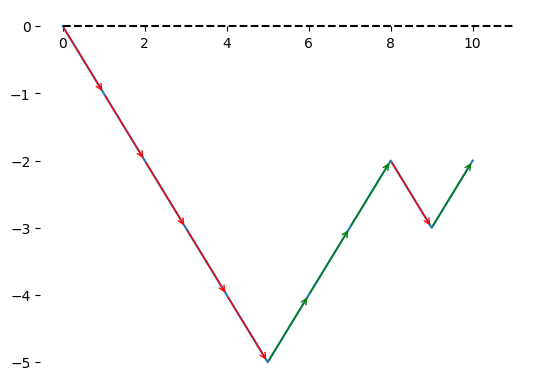

In [3]:
list_1, list_2 = random_walk(10)
plt.plot(list_1, list_2)

for i in range(1, len(list_1)):
    dx = list_1[i] - list_1[i-1]
    dy = list_2[i] - list_2[i-1]

    # Determine the arrow direction
    if dy > 0:  # Upward step
        plt.annotate('', xy=(list_1[i], list_2[i]), xytext=(list_1[i-1], list_2[i-1]),
                     arrowprops=dict(arrowstyle='->', color='green', lw=1))
    elif dy < 0:  # Downward step
        plt.annotate('', xy=(list_1[i], list_2[i]), xytext=(list_1[i-1], list_2[i-1]),
                     arrowprops=dict(arrowstyle='->', color='red', lw=1))

ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))
plt.hlines(y = 0,xmin = 0,  xmax = len(list_1), color = 'black', linestyle = '--')
plt.yticks(np.arange(int(min(plt.ylim())), int(max(plt.ylim())) + 1, 1))
plt.box(False)
plt.show()

With more multiple simulations and far more steps in the sample, we can begin to see how big the variation can be yet there is a tendency to converge towards zero.

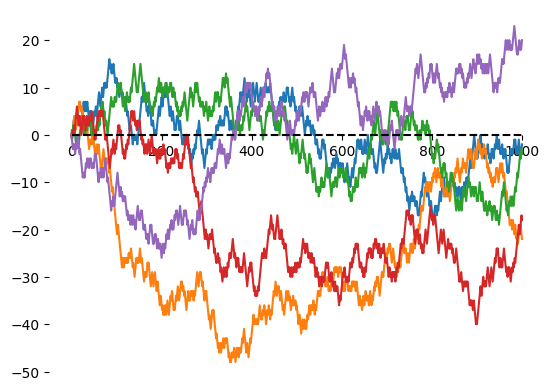

In [4]:
large_sim_x, large_sim_y = random_walk(1000)
large_sim_x2, large_sim_y2 = random_walk(1000)
large_sim_x3, large_sim_y3 = random_walk(1000)
large_sim_x4, large_sim_y4 = random_walk(1000)
large_sim_x5, large_sim_y5 = random_walk(1000)
plt.plot(large_sim_x, large_sim_y)
plt.plot(large_sim_x2, large_sim_y2)
plt.plot(large_sim_x3, large_sim_y3)
plt.plot(large_sim_x4, large_sim_y4)
plt.plot(large_sim_x5, large_sim_y5)
ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))
plt.hlines(y = 0,xmin = 0,  xmax = len(large_sim_x), color = 'black', linestyle = '--')
plt.box(False)
plt.show()

Here we are still only observing 5 simulations. We know that the expected value of t at any point is zero but what can we expect is a reasonable amount of noise?

The variance at any point on this graph is given by $t$ and therefore the standard deviation of the random walk is $\sqrt{t}$, meaning that we expect the majority of the random walks to be close in proximity to the bounds of $\sqrt{t}$. Furthermore, we expect these bounds to be crossed an infinite amount of times as $t \rightarrow \infty $

Let's demonstrate this visually.

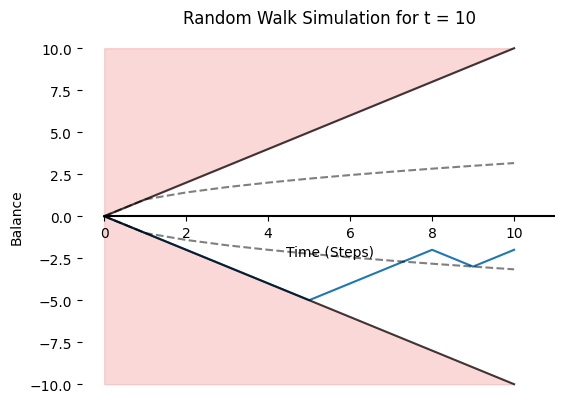

In [5]:
root_t = [t**0.5 for t in list_1]
minus_root_t = [-(t**0.5) for t in list_1]
max_y = np.array([i for i in list_1]) # Convert max_y to a NumPy array
min_y = np.array([-i for i in list_1]) # Convert min_y to a NumPy array


plt.plot(list_1, list_2)
plt.plot(list_1, root_t, linestyle = '--', alpha = 0.5, color = 'black')
plt.plot(list_1, minus_root_t, linestyle = '--', alpha = 0.5, color = 'black')
plt.plot(list_1, max_y, alpha = 0.75, color = 'black')
plt.plot(list_1, min_y, alpha = 0.75, color = 'black')
plt.hlines(y=0,xmin = 0, xmax = len(list_1), color = 'black')

plt.title(f'Random Walk Simulation for t = {len(list_1)-1}')
plt.xlabel('Time (Steps)')
plt.ylabel('Balance')
ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))

# Shading non-possible states of balance
plt.fill_between(list_1, max_y, len(list_1)-1, where=(max_y <= len(list_1)-1), color='lightcoral', alpha=0.3)
plt.fill_between(list_1, min_y, -(len(list_1)-1), where=(min_y >= -(len(list_1)-1)), color='lightcoral', alpha=0.3)

plt.box(False)
plt.show()

In [6]:
t_values = np.arange(0, 1001)  # Create an array of t values from 0 to 10000
sqrt_t_values = np.sqrt(t_values)
neg_sqrt_t_value = np.negative(sqrt_t_values)

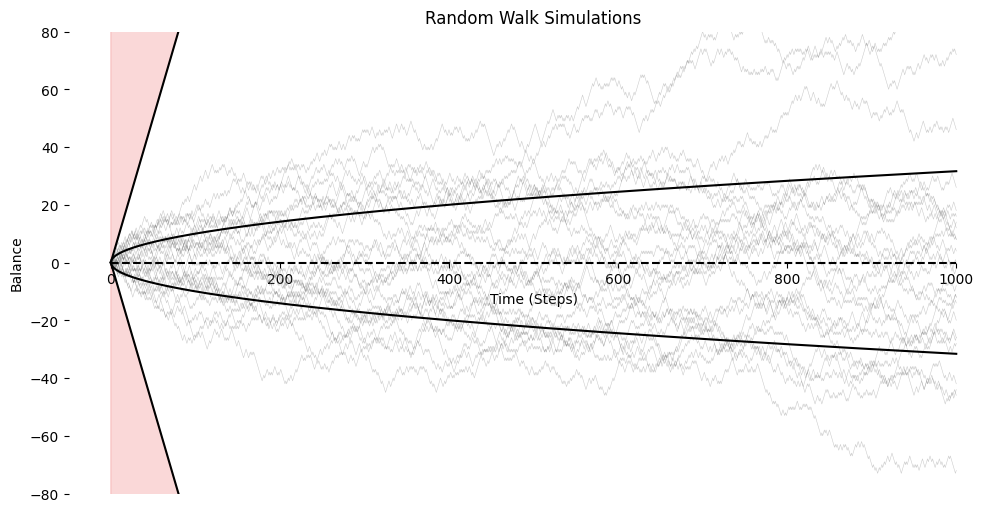

In [7]:
# Define the random walk function
def random_walk(n_trials):
    balance = [0]  # Start at zero
    running_balance = 0
    for _ in range(n_trials):
        outcome = random.randint(0, 1)
        running_balance += 1 if outcome == 1 else -1
        balance.append(running_balance)
    return list(range(len(balance))), balance

# Number of simulations
num_simulations = 25
n_trials = 1000

# Plot multiple simulations
plt.figure(figsize=(12, 6))  # Adjust figure size for better visualization
for _ in range(num_simulations):
    x, y = random_walk(n_trials)
    plt.plot(x, y, linewidth=0.4, alpha=0.4, color = 'gray')  # Thinner lines and transparency for readability


max_y = np.array([i for i in x])
min_y = np.array([-i for i in x])

# Plot the sqrt(t) and -sqrt(t) lines
plt.plot(t_values,sqrt_t_values, color = 'black')
plt.plot(t_values,neg_sqrt_t_value, color = 'black')
plt.plot(t_values, max_y, color = 'black')
plt.plot(t_values, min_y, color = 'black')

plt.fill_between(x, max_y, len(x)-1, where=(max_y <= len(x)-1), color='lightcoral', alpha=0.3)
plt.fill_between(x, min_y, -(len(x)-1), where=(min_y >= -(len(x)-1)), color='lightcoral', alpha=0.3)


# Enhance the plot
ax = plt.gca()  # Get current axes
ax.spines['bottom'].set_position(('data', 0))  # Set x-axis to the middle
plt.hlines(y=0, xmin=0, xmax=n_trials, color='black', linestyle='--')  # Add horizontal line at y=0
plt.box(False)  # Remove plot box
plt.ylim(-80,80)
plt.title('Random Walk Simulations')
plt.xlabel('Time (Steps)')
plt.ylabel('Balance')
plt.show()


## Random Walk with Drift

The simple random walk model works for an unbiased game, however, we are interested in the difference between achieved and reported margins from the casino's perspective. Therefore we need to introduce some bias to the return to player. In Stochastic Process, this is known as a random walk with drift.


### Proof of Expected Value

Now we are going to extend the previous proof for the **fair** coin flip and now switch to the case in which a player places a bet on a single number on a European Roulette wheel.

For a random Independent and Identically Distributed variable

<br>

$$Y_i \stackrel{iid}{\sim} \begin{cases}
35, & \text{with probability } \frac{1}{37} \\
-1, & \text{with probability } \frac{36}{37}
\end{cases}$$

for each $t,$   


$$X_{t} = \displaystyle\sum_{i=1}^{t} Y_i$$

and


$$X_{0} = 0$$

<br>

The game is no longer fair and so we need to calculate the expected value of every individual spin

<br>

$$ E\left[Y_i\right] = (-1) \cdot P(Y_i = -1) + (35) \cdot P(Y_i = 35) $$

$$= (-1) \cdot \frac{36}{37} + (35) \cdot \frac{1}{37} = -0.027... $$

<br>

And so the expected value of $X_{t}$ for any time t is given by:


<br>
$$ E\left[X_t\right] = E\left[\displaystyle\sum_{i=1}^t Y_i\right] = \displaystyle\sum_{i=1}^t \left(E\left[Y_i\right]\right) = t \cdot -0.027 = -0.027t$$

<br>


### Proof of Variance

#### 1. For Single Step

The equation for the variance of any random variable is given by the following equation:

<br>

$$ \mathrm{Var}[{X}] = E[X^2] - (E[X])^2$$

<br>

therefore the variance after a single step $Y_{i}$ is given by:

<br>

$$ \mathrm{Var}(Y_{i}) = E[Y_{i}^2]-(E[Y_{i}])^2 $$

<br>

again, $Y_{i}$ can only take two values, -1 or 35

<br>
$$ Y_{i} \in \left\{ -1, 35 \right\} $$

<br>

therefore:

<br>

$$E[Y_{i}^2] = (-1)^2 \cdot P(Y_{i} = -1) + (35)^2 \cdot P(Y_{i} = 35) $$

<br>

$$= 1 \cdot \frac{36}{37} + 1225 \cdot \frac{1}{37} $$

<br>

$$ = \frac{36}{37} + \frac{1225}{37} = \frac{1261}{37} =  34.08$$

<br>

and the mean value is given by:

<br>

$$ E[Y_{i}] = \frac{-1}{37} $$

<br>

so the square of the mean term in the variance equation is:

<br>

$$ (E[Y_{i}])^2 = \left(\frac{-1}{37}\right)^2 = \frac{1}{1369} $$

<br>

and therefore substituting these into the variance formula yields:

<br>

$$ \mathrm{Var}(Y_{i}) = \frac{1261}{37} - \frac{1}{1369} = \frac{46656}{1369} = 34.08 $$

<br>

and

<br>

$$ \mathrm{Std}(X_{i}) = \sqrt{\mathrm{Var}(X_{i})} = \pm\sqrt{34.08} = \pm 5.84$$

#### 2. For Any Step t

Since the variables are independent we can simply sum the variances of each individual spin, therefore

$$ \mathrm{Var}(Y_{t}) = \sum_{i=1}^{t} \mathrm{Var}(Y_{i}) = t \cdot
 \frac{46656}{1369} = 34.08t $$

 and

$$ \mathrm{Std}(Y_{t}) = \sqrt{\sum_{i=1}^{t} \mathrm{Var}(Y_{i})} = \sqrt{t} \cdot
 \sqrt\frac{46656}{1369} = \pm 5.84\cdot\sqrt{t} $$

<br>

***Reminder***
This will only work if the random variables are independent of one-another, for roulette this assumption holds as the chances of me spinning any given number is not influenced by the last spin. This assumption may not hold for Sports Betting, especially when probabilities are dynamic.




### Python Implementation

First I'm going to create a fair random walk process which can be seen as analagous to a coin flip game

In [8]:
import numpy as np
from scipy.stats import norm

def roulette_analysis(margin_percent, stop_gaps, num_spins=10000, num_players=1000):
    # Constants
    bet_amount = 1  # £1 per spin

    # Convert margins to decimal
    margins = [m / 100 for m in margin_percent]

    # Roulette probabilities and payouts
    p_win = 1 / 37
    p_lose = 36 / 37
    win_payout = 35  # Winning payout
    lose_payout = -1  # Losing payout

    results = []

    for margin in margins:
        mu_spin = -margin * bet_amount  # Expected value per spin

        # Variance and standard deviation of a single spin
        variance_spin = (p_win * (win_payout - mu_spin) ** 2 + p_lose * (lose_payout - mu_spin) ** 2)
        std_dev_spin = np.sqrt(variance_spin)

        for barrier in stop_gaps:
            # Cumulative stats for 10,000 spins
            mu_total = num_spins * mu_spin
            sigma_total = np.sqrt(num_spins) * std_dev_spin

            # Adjusting for maximum deviation (sqrt(2) factor)
            sigma_max = sigma_total * np.sqrt(2)

            # Probability of hitting the barrier
            z = (-barrier - mu_total) / sigma_max
            prob_hit = norm.cdf(z)

            # Improved spins before hitting the barrier
            # Account for variance using a normal approximation for early stopping
            expected_loss_per_spin = mu_spin
            if mu_spin < 0:  # Only compute if there is a negative drift
                spins_before_barrier = min(num_spins, barrier / abs(expected_loss_per_spin))
            else:
                spins_before_barrier = num_spins

            # Recalculate adjusted spins accounting for variance
            spins_lost_per_player = prob_hit * spins_before_barrier
            total_spins = (num_players * num_spins) - (num_players * spins_lost_per_player)

            # Adjusted casino profit
            profit = total_spins * -mu_spin


            # Append results
            results.append({
                "margin": margin * 100,
                "barrier": barrier,
                "prob_hit": prob_hit,
                "expected_spins": total_spins,
                "profit": profit
            })

    return results

# Example usage
margins = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30]  # Margins in percent
stop_gaps = [500, 1000, 2000]  # Stop-gaps in £

results = roulette_analysis(margins, stop_gaps)

# Print results

for result in results:
    print(f"Margin: {result['margin']:.1f}%, Barrier: £{result['barrier']}, Prob. of hitting barrier: {result['prob_hit']:.2%}, "
          f"Expected Spins: {result['expected_spins']:.0f}, Profit: £{result['profit']:.2f}")


Margin: 2.0%, Barrier: £500, Prob. of hitting barrier: 35.82%, Expected Spins: 6418373, Profit: £128367.45
Margin: 2.0%, Barrier: £1000, Prob. of hitting barrier: 16.63%, Expected Spins: 8337268, Profit: £166745.36
Margin: 2.0%, Barrier: £2000, Prob. of hitting barrier: 1.46%, Expected Spins: 9853803, Profit: £197076.06
Margin: 4.0%, Barrier: £500, Prob. of hitting barrier: 45.18%, Expected Spins: 5482038, Profit: £219281.51
Margin: 4.0%, Barrier: £1000, Prob. of hitting barrier: 23.37%, Expected Spins: 7663095, Profit: £306523.79
Margin: 4.0%, Barrier: £2000, Prob. of hitting barrier: 2.63%, Expected Spins: 9736879, Profit: £389475.15
Margin: 6.0%, Barrier: £500, Prob. of hitting barrier: 54.82%, Expected Spins: 5431641, Profit: £325898.43
Margin: 6.0%, Barrier: £1000, Prob. of hitting barrier: 31.40%, Expected Spins: 6859814, Profit: £411588.84
Margin: 6.0%, Barrier: £2000, Prob. of hitting barrier: 4.50%, Expected Spins: 9550305, Profit: £573018.31
Margin: 8.0%, Barrier: £500, Prob.